# Beispiele von Felddarstellungen

Im Folgenden werden verschiedene Möglichkeiten vorgestellt, wie in Python Vektor-Felder dargestellt werden können.
Es handelt sich dabei um elektrische und magnetische Felder mit bezug auf die Lehrveranstalltung "Elektrische und Magnetische Felder" an der Universität Duisburg-Essen (Duisburg, DE) (https://www.ate.uni-duisburg-essen.de/).

Das Notebook gliedert sich in vier Teilabschnitte:
  1) Import von Funktionen und Klassen aus gängigen Python-Bibliotheken.
  2) Definition von Funktionen für verschiedene Feld-Beispiele.
  3) Erzeugung eines Gitters für die Felddarstellung.
  4) Visualisierung der Felder mit verschiedenen Funktionen.
  
 Nutzen Sie gern die Möglichkeit dieses Skript nach belieben in Binder oder auf Ihrem PC zu modifizieren.
 Sollte Sie Fragen haben, so nutzen Sie bitte einfach eine der in Moodle angegebenen Möglichkeiten.

## Import aus Python-Bibliotheken

Hier werden Funktionen und Klassen aus verschiedenen Python-Bibotheken geladen:
  * **numpy:** Diese Biblothek stellt eine vielzahl an Werkzeugen zur Verfügung um mathematische Berechnungen durchzuführen.  Dies umfasst auch spezielle Arrays für den mathematischen Umgang und einige mathematische Konstanten. (Wikipedia: https://de.wikipedia.org/wiki/NumPy)
  * **scipy:** Aus dieser Bibliothek werden lediglich die Naturkonstanten geladen. (Wikipedia: https://de.wikipedia.org/wiki/SciPy)
  * **matplotlib:** Diese Biblothek umfasst ein breites Spektrum an Funktionen zur Darstellung unterschiedlichster Daten.  Ein paar daraus werden hier verwendet (siehe Unten). (Wikipedia: https://de.wikipedia.org/wiki/Matplotlib)
  * **lic:** Die Funktion, die diese Bibliothek bereit stellt, ist eine recht elegante Methode um Vektor-Felder zu visualisieren (siehe Unten). (Wikipedia: https://de.wikipedia.org/wiki/Line_Integral_Convolution)

In [1]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
import lic

## Definition von Vektor-Feldern

An dieser Stelle werden vier bespielhafte Vektor-Felder als Funktionen in Python definiert.
Dabei werden jeweils die kartesischen Vektorkomponenten ($x$-, $y$- und $z$-Komponenten) separat als Rückgabewert berechnet.
Jede Funktion hat als Eingabewerte kartesische Koordinaten ($x$, $y$, und $z$), die auch jeweils ein Array von Werten sein können (siehe Gitter im nächsten Teil).
Die Arrays müssen dabei aber die gleichen Größen aufweisen.

Die beiden Funktionen mit dem Wort "single", sind Vektorfelder eines einzelnen Objekts (Linienstrom, Linienladung).
Hingegen werden bei den beiden Funktionen mit dem Wort "double" vektoriell Felder zweier einzelner überlagert.
Diese Felder werden als Funktionen definiert:
  * **fieldFun_H_single:** Dies beschreibt die magnetische Feldstärke $\vec{H}_\mathrm{single}$ eines linienhaften Stroms der Stromstärke $I_0$, der entlang der $z$-Achse fließt.
  * **fieldFun_H_double:** Hierbei wird die Superposition zweier Linienströme durchgeführt, die antiparallel fließen (Stichwort Zweidrahtleitung) und symmetrisch mit dem Abstand $d$ parallel zur $z$-Achse liegen.  Die Berechnung erfolgt mit $\vec{H}_\mathrm{double} = \vec{H}_\mathrm{single}\left(\vec{r}-(d,0,0)^\mathrm{T}\right) - \vec{H}_\mathrm{single}\left(\vec{r}-(-d,0,0)^\mathrm{T}\right)$
  * **fieldFun_E_single:** Dies beschreibt die elektrische Feldstärke $\vec{E}_\mathrm{single}$ einer Linienladung entlang der $z$-Achse mit der Linienladungsdichte $\lambda_0$.
  * **fieldFun_E_double:** Hierbei wird die Superposition zweier Linienladung durchgeführt, die jeweils positiv geladen sind (Stichwort Ionenfalle) und symmetrisch mit dem Abstand $d$ parallel zur $z$-Achse liegen.  Die Berechnung erfolgt mit $\vec{E}_\mathrm{double} = \vec{E}_\mathrm{single}\left(\vec{r}-(d,0,0)^\mathrm{T}\right) + \vec{E}_\mathrm{single}\left(\vec{r}-(-d,0,0)^\mathrm{T}\right)$
  
Allen Funktionen ist gemein, dass keine Einheiten enthalten sind.
Dies ist üblich in numerischen Berechnungen und so muss der Anwender stets die korrekte Umrechnung durchführen (Stichwort zugeschnittene Größengleichungen).
Konstanten aus der scipy-Modul sind stets in SI-Einheiten.
Entsprechend wird hier auch einfach mit der Längeneinheit Meter gearbeitet und folglich entspricht der Wert `d=5e-3` dem Abstand $d=5\,\mathrm{mm}$.
Der Zusatz `e-3` ist die verkürzte Schreibweise von $\cdot 10^{-3}$ und in Python ohne weiteres verwendbar.

<em>(Für den Programmierer: Es ließe sich auch alles in einem mehrdimensionalem Numpy-Array ablegen und als einzelnen Rückgabewert definieren, was Vortielhaft für weitere Berechnungen und Verarbeitungen ist.   Darauf wurde hier zur einfacheren Lesbarkeit aber verzichtet.)</em>

In [2]:
def fieldFun_H_single(x, y, z):
    I0 = 1
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    with np.errstate(all='ignore'): # Da rho=0 sein kann, kommt es ggf. zu Singularitäten. Die Warnung dazu wird hiermit unterdrückt.
        Hx = I0 / (2*np.pi*rho) * -np.sin(phi)
        Hy = I0 / (2*np.pi*rho) *  np.cos(phi)
        Hz = 0
    return Hx, Hy, Hz

def fieldFun_H_double(x, y, z):
    d = 5e-3
    Hx1, Hy1, Hz1 = fieldFun_H_single(x-d, y, z)
    Hx2, Hy2, Hz2 = fieldFun_H_single(x+d, y, z)
    Hx = Hx1 - Hx2
    Hy = Hy1 - Hy2
    Hz = Hz1 - Hz2
    return Hx, Hy, Hz

def fieldFun_E_single(x, y, z):
    lambda0 = 1
    rho = np.sqrt(x**2 + y**2)
    with np.errstate(all='ignore'): # Da rho=0 sein kann, kommt es ggf. zu Singularitäten. Die Warnung dazu wird hiermit unterdrückt.
        Ex = lambda0 / (2*np.pi*const.epsilon_0) * x / rho**2
        Ey = lambda0 / (2*np.pi*const.epsilon_0) * y / rho**2
        Ez = 0
    return Ex, Ey, Ez

def fieldFun_E_double(x, y, z):
    d = 5e-3
    Ex1, Ey1, Ez1 = fieldFun_E_single(x-d,y,z)
    Ex2, Ey2, Ez2 = fieldFun_E_single(x+d,y,z)
    Ex = Ex1 + Ex2
    Ey = Ey1 + Ey2
    Ez = Ez1 + Ez2
    return Ex, Ey, Ez

### Feldwert in einem Punkt

Hier wird beispielhaft der Feld-Vektor in einem Punkt $P\,(-10|5|3)\,\mathrm{mm}$ bestimmt und mit der 'print()'-Funktion ausgegeben.

In [3]:
field_value = fieldFun_H_single(-10e-3, 5e-3, 3e-3)
print('field_value =', field_value)

field_value = (-6.366197723675815, -12.732395447351625, 0)


## Erstellung eines Gitters

An dieser Stelle wird ein Gitter aus Punkten erzeugt.
An den Gitterpunkten wird das Feld mittels der bereits definierten Funktionen bestimmt und kann dann im nächsten Schritt visualisiert werden.
In diesem Beispiel wird ein gleichmäßiges 2D-Gitter für eine $xy$-Schnittebene bei $z=0$ in den Bereichen $-20\,\mathrm{mm} \le x \le 20\,\mathrm{mm}$ und $-20\,\mathrm{mm} \le y \le 20\,\mathrm{mm}$ erzeugt.
Die Schrittweite der diskreten Punkte ergibt sich aus der Anzahl an Punkten verteilt auf den Bereich mit $\Delta x = (x_\mathrm{max} - x_\mathrm{min})\,/\,(Nx-1)$.

Nach der Festlegung der Gittereigenschaften, werden zunächst zwei eindimensionale numpy-Arrays erzeugt mittels der Funktion 'linspace()', die im angegebenen Bereich linear verteilt der angegebenen Anzahl entsprechend Werte erzeugt.
Mittels der Funktion `meshgrid` werden dann zwei zweidimensionale Arrays erzeugt, so dass aus der kombination von `xx` und `yy` immer eindeut ein Punkt resultiert.
Um nun auch für die $z$-Position eine zugehöriges 2D-Array zu erhalten, wird ein mit Einsen gefülltes Array anhand der `xx` oder `yy` Arrays erzeugt und mit der gewünschten $z$-Position multipliziert.

Ein Punkt bei den beispielhaften Array-Indizes von `3, 7` hat damit die der Ausgabe entsprechenden kartesischen Koordinaten.

In [4]:
xmin = -20e-3
xmax = +20e-3
Nx = 20

ymin = -20e-3
ymax = +20e-3
Ny = 20

zpos = 0

x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)

xx, yy = np.meshgrid(x, y)

zz = np.ones(xx.shape) * zpos

print('Beispiel-Koordinate bei den Indizes 3 und 7:')
print('x =', xx[3,7], ' | y =', yy[3,7], ' | z =', zz[3,7], '  Einheit (m)')

Beispiel-Koordinate bei den Indizes 3 und 7:
x = -0.005263157894736843  | y = -0.01368421052631579  | z = 0.0   Einheit (m)


### Berechnung des Feldes

Im ersten Schritt wird eine Feld-Funktion ausgewählt, indem mit der Variablen `fieldFun` nun auf eine der bereits definierten Funktionen gezeigt wird.
Anschließend wird die Funktion mit den Gitter-Arrays aufgerufen und die kartesichen Vektorkomponenten in drei Variablen abgelegt.
Für Beschriftungen wird das Feld mit $F$ bezeichnet, ist aber hier kein Kraftfeld.
Es entspricht je nach ausgewählter Feldfunktion dem darin definierten Feld.

Zudem wird in diesem Teil auch der Betrag des Vektorfeldes ermittelt.
Dieser wird bei manchen der Visualisierungsbeispielen gebraucht.
Beispielhaft wird außerdem das Maximum und Minimum des Betrags, welcher an den Gitterkoordinaten bestimmt wurde, bestimmt und ausgegeben.

In [5]:
fieldFun = fieldFun_E_double

field_x, field_y, field_z = fieldFun(xx, yy, zz)

field_abs = np.sqrt( field_x**2 + field_y**2 + field_z**2 )

field_absmin = np.nanmin(field_abs)
field_absmax = np.nanmax(field_abs)
print('Minimalwert im betrachteten Gitter:', field_absmin)
print('Maximalwert im betrachteten Gitter:', field_absmax)

Minimalwert im betrachteten Gitter: 1270411596923.0376
Maximalwert im betrachteten Gitter: 17237340671007.97


## Darstellung des Betrags des Feldes in einem Color-Plot

Die in dieser Darstellung genutzte Funktion ist die `pcolor`-Funktion aus dem `matplotlib`-Modul.
Ergänzt wird dies mit einer Color-Bar aus der Funktion `colorbar`, welche die den Fraben zugehörige Werte-Skala darstellt.
Mittels der Angabe `.axis('equal')` werden in horizontaler und vertikaler Richtung Längen gleich dargestellt.
Ohne dies würde des standardmäßig gestreckt werden.

Die Darstellung mittels eines Color-Plots ist eine sehr gängige und unproblematische Art der Darstellung eines Feldes.
Es wird hierbei allerdings immer nur ein Skalar-Feld dargestellt, sprich es gibt keine Anzeige der Richtung des betrachteten Vektorfeldes.
In diesem Beispiel wird das Skalar-Feld welches sich aus dem Betrag des Feldes ergibt visualisiert.
Alternativ könnten auch Vektorkomponenten dargestellt werden.

In der Variante a) ist der Betrag linear mit der Farbskala verknüpft.
Dies kann bei starken Feldwert-Schwankungen dazu führen, dass in der Darstellung lediglich die extremwerte sichtbar sind.
Häufig wird daher der Logarithmus auf das Feld angewandt um eine logarithmische Zuordnung zu den Farben zu erhalten, was in b) gezeigt ist.

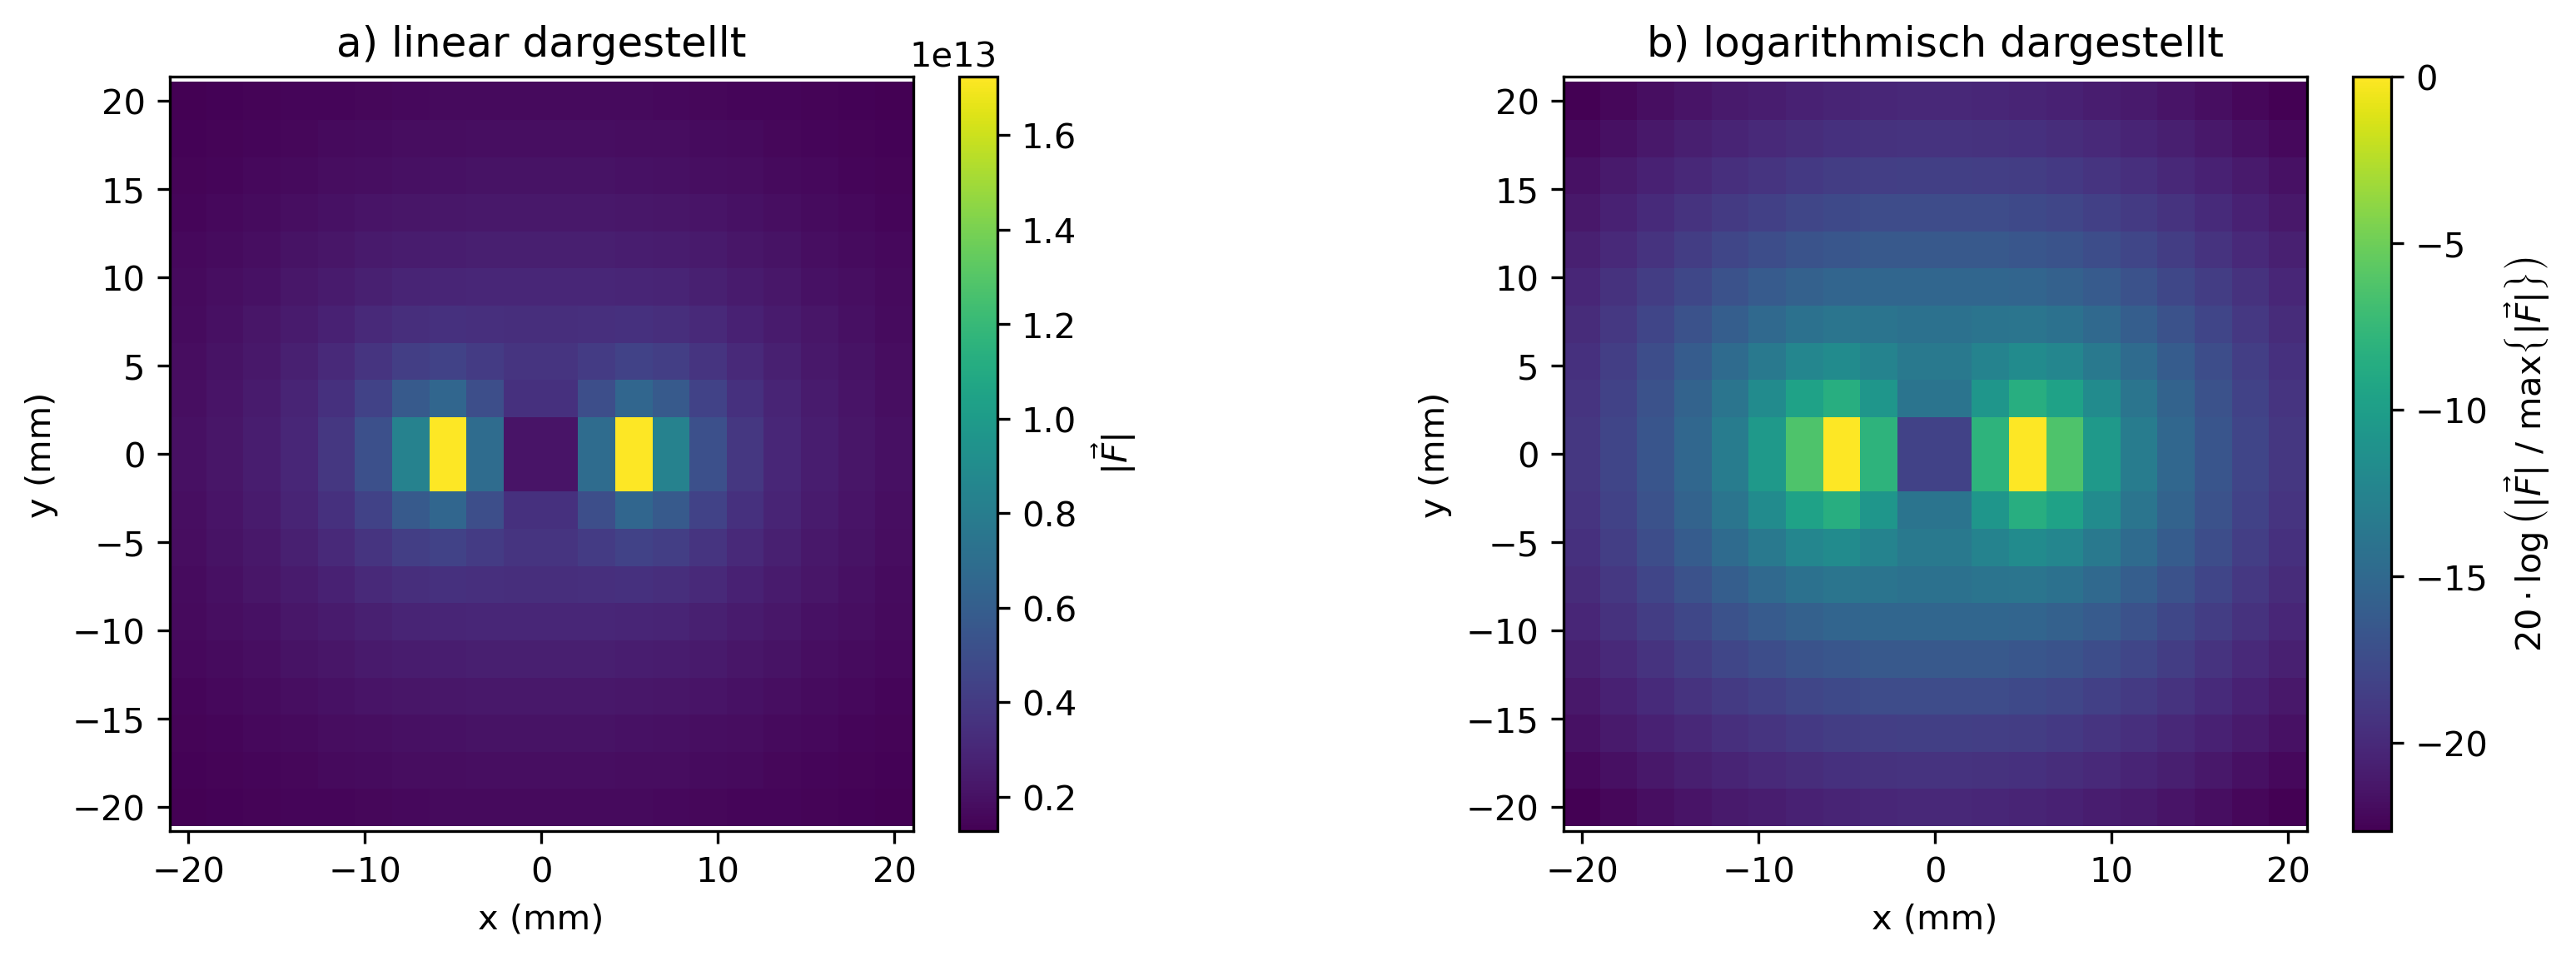

In [6]:
fig = plt.figure(figsize=[12,4], dpi=300)
fig.subplots_adjust(wspace=0.5, hspace=0.5)
axs = fig.subplots(1, 2)
ims = []
cbs = []

axs[0].axis('equal')
ims.append( axs[0].pcolor(xx/1e-3, yy/1e-3, field_abs, shading='auto') )
axs[0].set_xlabel('x (mm)')
axs[0].set_ylabel('y (mm)')
axs[0].set_title('a) linear dargestellt')
cbs.append( plt.colorbar(ims[0], ax=axs[0]) )
cbs[0].ax.set_ylabel(r'$\left|\vec{F}\right|$')

axs[1].axis('equal')
ims.append( axs[1].pcolor(xx/1e-3, yy/1e-3, 20*np.log10(field_abs/field_absmax), shading='auto') )
axs[1].set_xlabel('x (mm)')
axs[1].set_ylabel('y (mm)')
axs[1].set_title('b) logarithmisch dargestellt')
cbs.append( plt.colorbar(ims[1], ax=axs[1]) )
cbs[1].ax.set_ylabel(r'$20\cdot \log\left( \left|\vec{F}\right| ~/~ \max\left\{ \left|\vec{F}\right| \right\} \right)$')

plt.show()

## Darstellung des Feldes mit Pfeilen

Für die hier gezeigte Darstellung wird die Funktion `quiver` aus dem `matplotlib`-Modul verwendet.

Ebenfalls eine gängige Darstellung ist die mit Pfeilen für das Vektorfeld.
Dabei ist grundlegend zu beachten, dass nur die in der Schnittebene liegenden Vektorkomponenten genutzt werden können.
In den hier gezeigten Beispielen demnach die $x$- und $y$-Komponenten.
Diesen beiden Komponenten entsprechend wird dann ein Pfeil gezeichnet.

Es gibt unterschiedliche Möglichkeiten neben der Richtung auch den Betrag sichtbar zu machen.
Im Fall a) ist die Länge des Pfeils entsprechend dem Berag zugeordnet, wohingegen im Fall c) die Pfeile eine gleichbleibende größe haben und dem Betrag entsprechend gefärbt sind.
In der Variante b) ist nur die Richtung dargestellt, was häufig mit einem Color-Plot für den Betrag (siehe oben) im Hintergrund kombiniert wird.

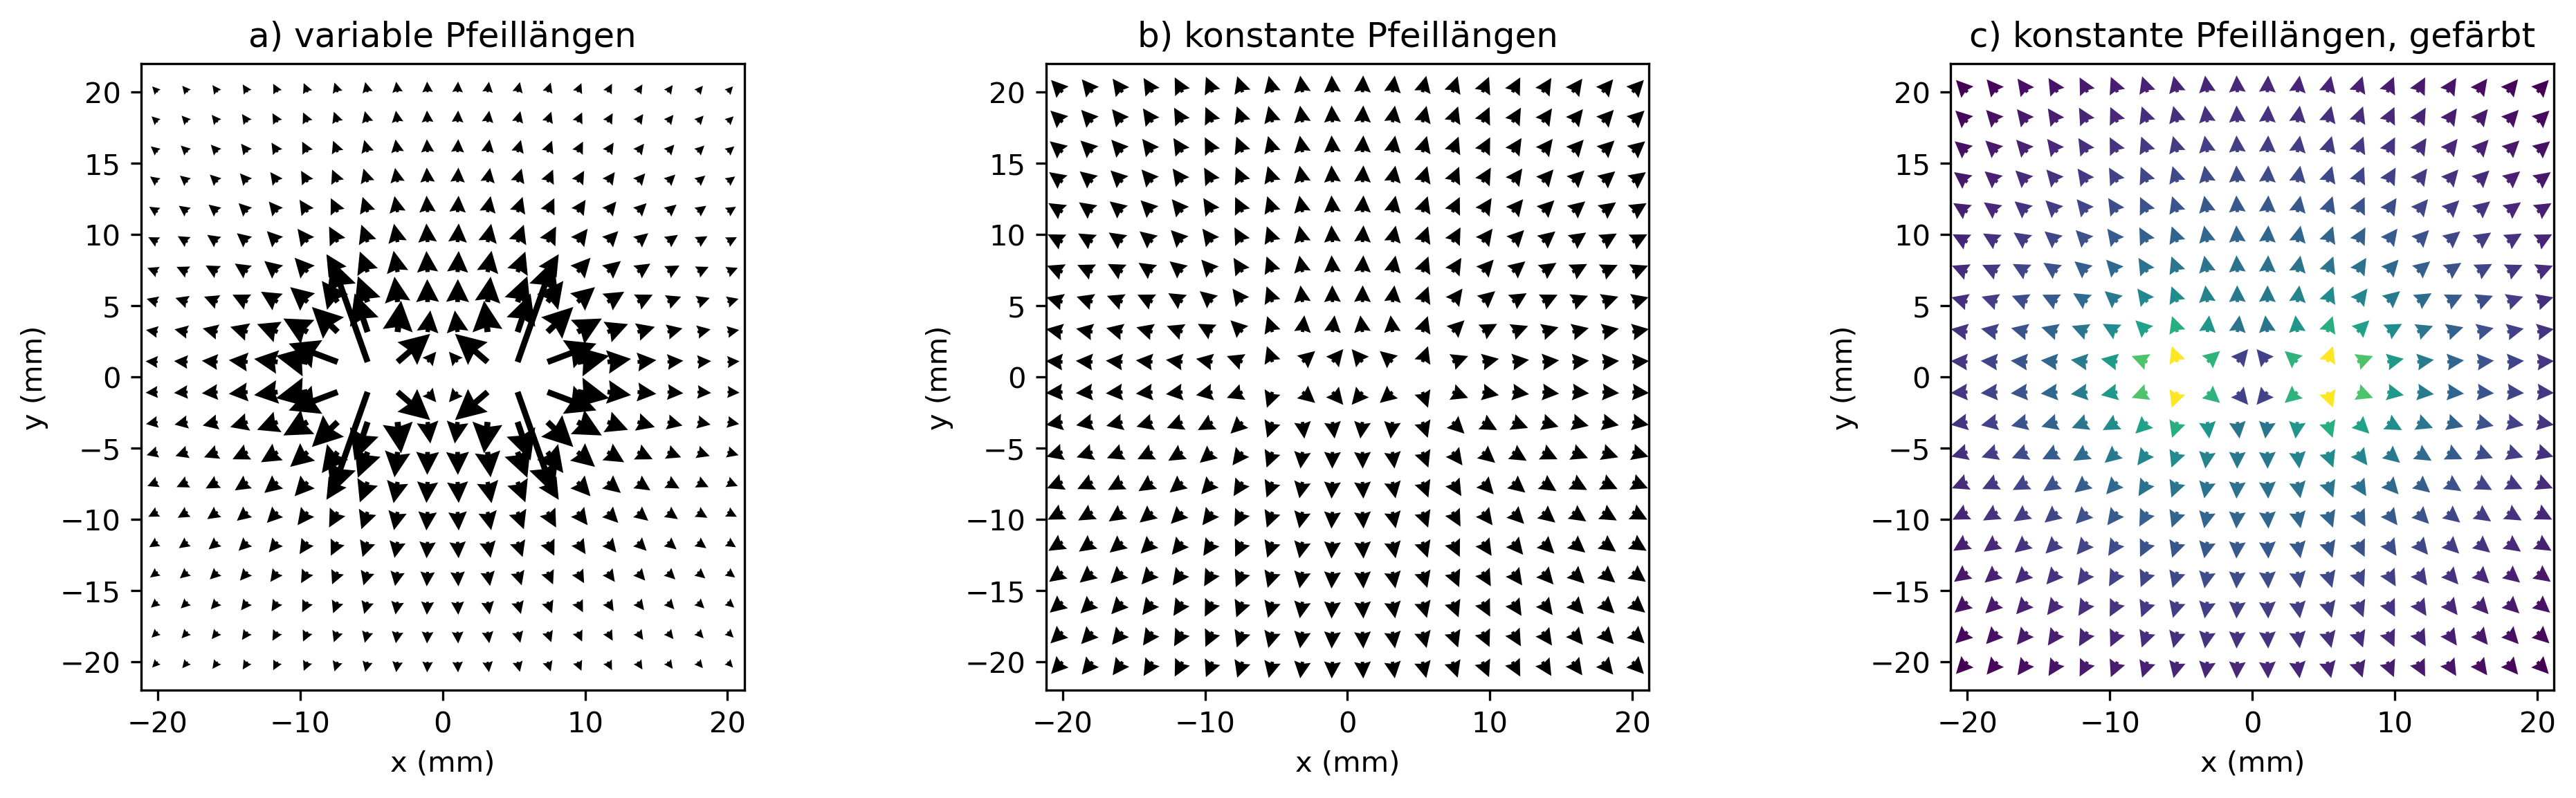

In [7]:
fig = plt.figure(figsize=[15,4], dpi=300)
fig.subplots_adjust(wspace=0.5, hspace=0.5)
axs = fig.subplots(1, 3)

axs[0].axis('equal')
axs[0].quiver(xx/1e-3, yy/1e-3, field_x, field_y, width=0.01, headwidth=5)
axs[0].set_xlabel('x (mm)')
axs[0].set_ylabel('y (mm)')
axs[0].set_title('a) variable Pfeillängen')

axs[1].axis('equal')
axs[1].quiver(xx/1e-3, yy/1e-3, field_x/field_abs, field_y/field_abs, width=0.01, headwidth=5)
axs[1].set_xlabel('x (mm)')
axs[1].set_ylabel('y (mm)')
axs[1].set_title('b) konstante Pfeillängen')

axs[2].axis('equal')
axs[2].quiver(xx/1e-3, yy/1e-3, field_x/field_abs, field_y/field_abs, 20*np.log10(field_abs/field_absmax), width=0.01, headwidth=5)
axs[2].set_xlabel('x (mm)')
axs[2].set_ylabel('y (mm)')
axs[2].set_title('c) konstante Pfeillängen, gefärbt')

plt.show()

## Darstellung des Feldes mit Feldlinien.

Für die hier gezeigte Darstellung wird die Funktion `streamplot` aus dem `matplotlib`-Modul verwendet.

Feldlinien sind eine beliebte Darstellung, sind aber eine der am schwierigsten zu erstellende Visualisierung.
Es muss für jede Feldlinie eine beschreibende, parametrisierte Funktion gefunden werden, was ein nicht trivialer Vorgang ist.
Im Fall der hier verwendeten Funktion wird daher ein anderer Ansatz gewählt und man erhält auch keine "echten" Feldlinien.
Es werden randomisiert Startpunkte gewählt und für diese werden Linien erzeugt indem man dem gegebenen Vektorfeld ein stück weit folgt (üblichweise in beide Richtungen ausgehend von dem Punkt).
Die so erhaltene Linie wird dann visualisiert und mit einem Pfeil versehen.

Derartige Linien beinhalten dan aber keine (direkte) Information über die Feldstärke.
Es lassen sich bei der verwendeten `streamplot`-Funktion jedoch zwei Methoden der Betragsdarstellung aktivieren.
Bei der in a) gezeigten Variante, wird graduell die Strichdicke anhand des Betrags modifiziert.
In Variante b) ist die Strichdicke konstant, dafür sind die Striche selbst dem Betrag entsprechend eingefärbt.

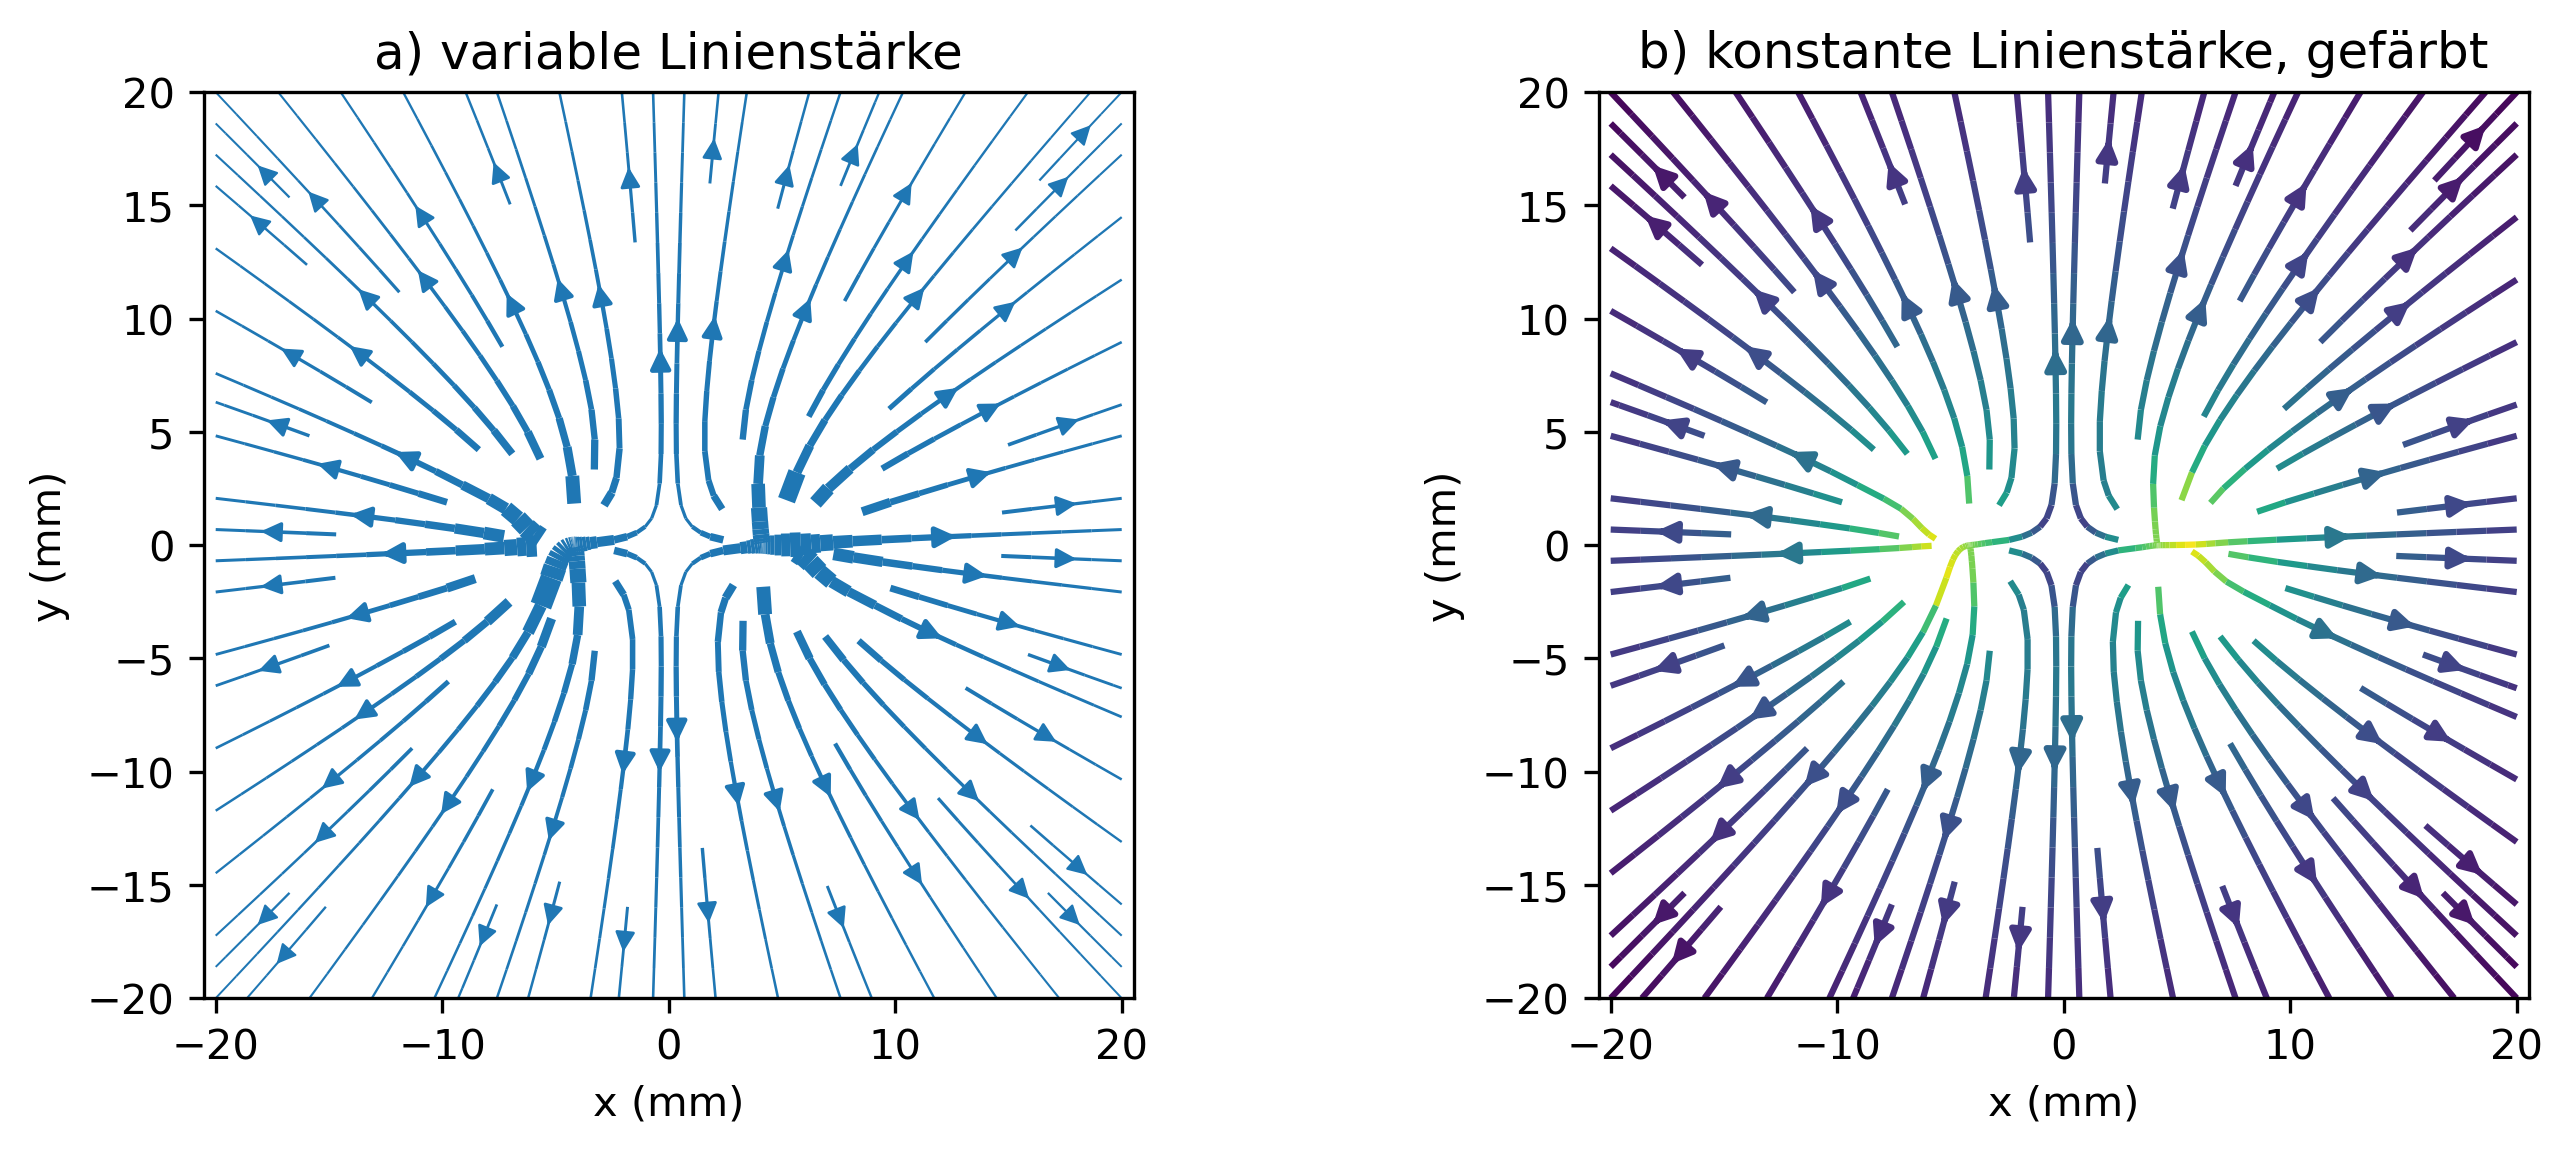

In [8]:
fig = plt.figure(figsize=[10,4], dpi=300)
fig.subplots_adjust(wspace=0.5, hspace=0.5)
axs = fig.subplots(1, 2)

axs[0].axis('equal')
axs[0].streamplot(xx/1e-3, yy/1e-3, field_x, field_y, linewidth=6*field_abs/field_absmax, density=1)
axs[0].set_xlabel('x (mm)')
axs[0].set_ylabel('y (mm)')
axs[0].set_title('a) variable Linienstärke')

axs[1].axis('equal')
axs[1].streamplot(xx/1e-3, yy/1e-3, field_x, field_y, color=20*np.log10(field_abs/field_absmax), linewidth=1.5, density=1)
axs[1].set_xlabel('x (mm)')
axs[1].set_ylabel('y (mm)')
axs[1].set_title('b) konstante Linienstärke, gefärbt')

plt.show()

## Darstellung mittels Line Integral Covolution (LIC)-Methode.

Für die nun gezeigte Darstellung ist es günstig ein feines Gitter zu verwenden.
Bisher ist das Gitter in den Beispielen eher grob gewählt.
Es wird daher in einem ersten Schritt ein feineres Gitter angelegt und dafür das Feld bestimmt.
Zur Unterscheidung wird hier der Zusatz `_f` den Variablen angehangen.

Die Darstellung der Felder erfolgt über die Funktion `lic` aus dem gleichnamigen Python-Modul.

Bei dieser Methode werden Feldlinienartige Bilder erzeugt.
Die Methode erzeugt sich zunächst ein Bild mit randomisierten Werten für jedes Pixel, wobei ein Pixel einem Gitter-Punkt entspricht.
Dieses Rauschbild wird dann in einem nächsten Schritt modifiziert.
Ohne näher auf die Methode zu kommen, kann man sich die Erzeugung so vorstellen, als dass das Rauschbild dem Vektorfeld entsprechend verschmiert wird.

Diese Art der Darstellung ist eher selten zu sehen.
Sie ist allerdings sehr robust, bedarf aber eines feinen Gitters oder einer entsprechenden Interpolation um ein Bild mit hoher Auflösung zu erzielen.
Die Methode selbst liefert ein Bild ohne Informationen über den Feldbetrag, wie es in a) zu sehen ist.
Dies lässicht aber auch hier lösen, indem ein Color-Plot überlagert wird, was in b) gezeig ist.

In [9]:
Nx_f = 200
Ny_f = 200

x_f = np.linspace(xmin, xmax, Nx_f)
y_f = np.linspace(ymin, ymax, Ny_f)

xx_f, yy_f = np.meshgrid(x_f, y_f)

zz_f = np.ones(xx_f.shape) * zpos

field_x_f, field_y_f, field_z_f = fieldFun(xx_f, yy_f, zz_f)

field_abs_f = np.sqrt( field_x_f**2 + field_y_f**2 + field_z_f**2 )

field_absmin_f = np.nanmin(field_abs_f)
field_absmax_f = np.nanmax(field_abs_f)

In [10]:
lic_result = lic.lic(field_y_f, field_x_f, length=30)

generate lics: 100%|██████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 89.13it/s]


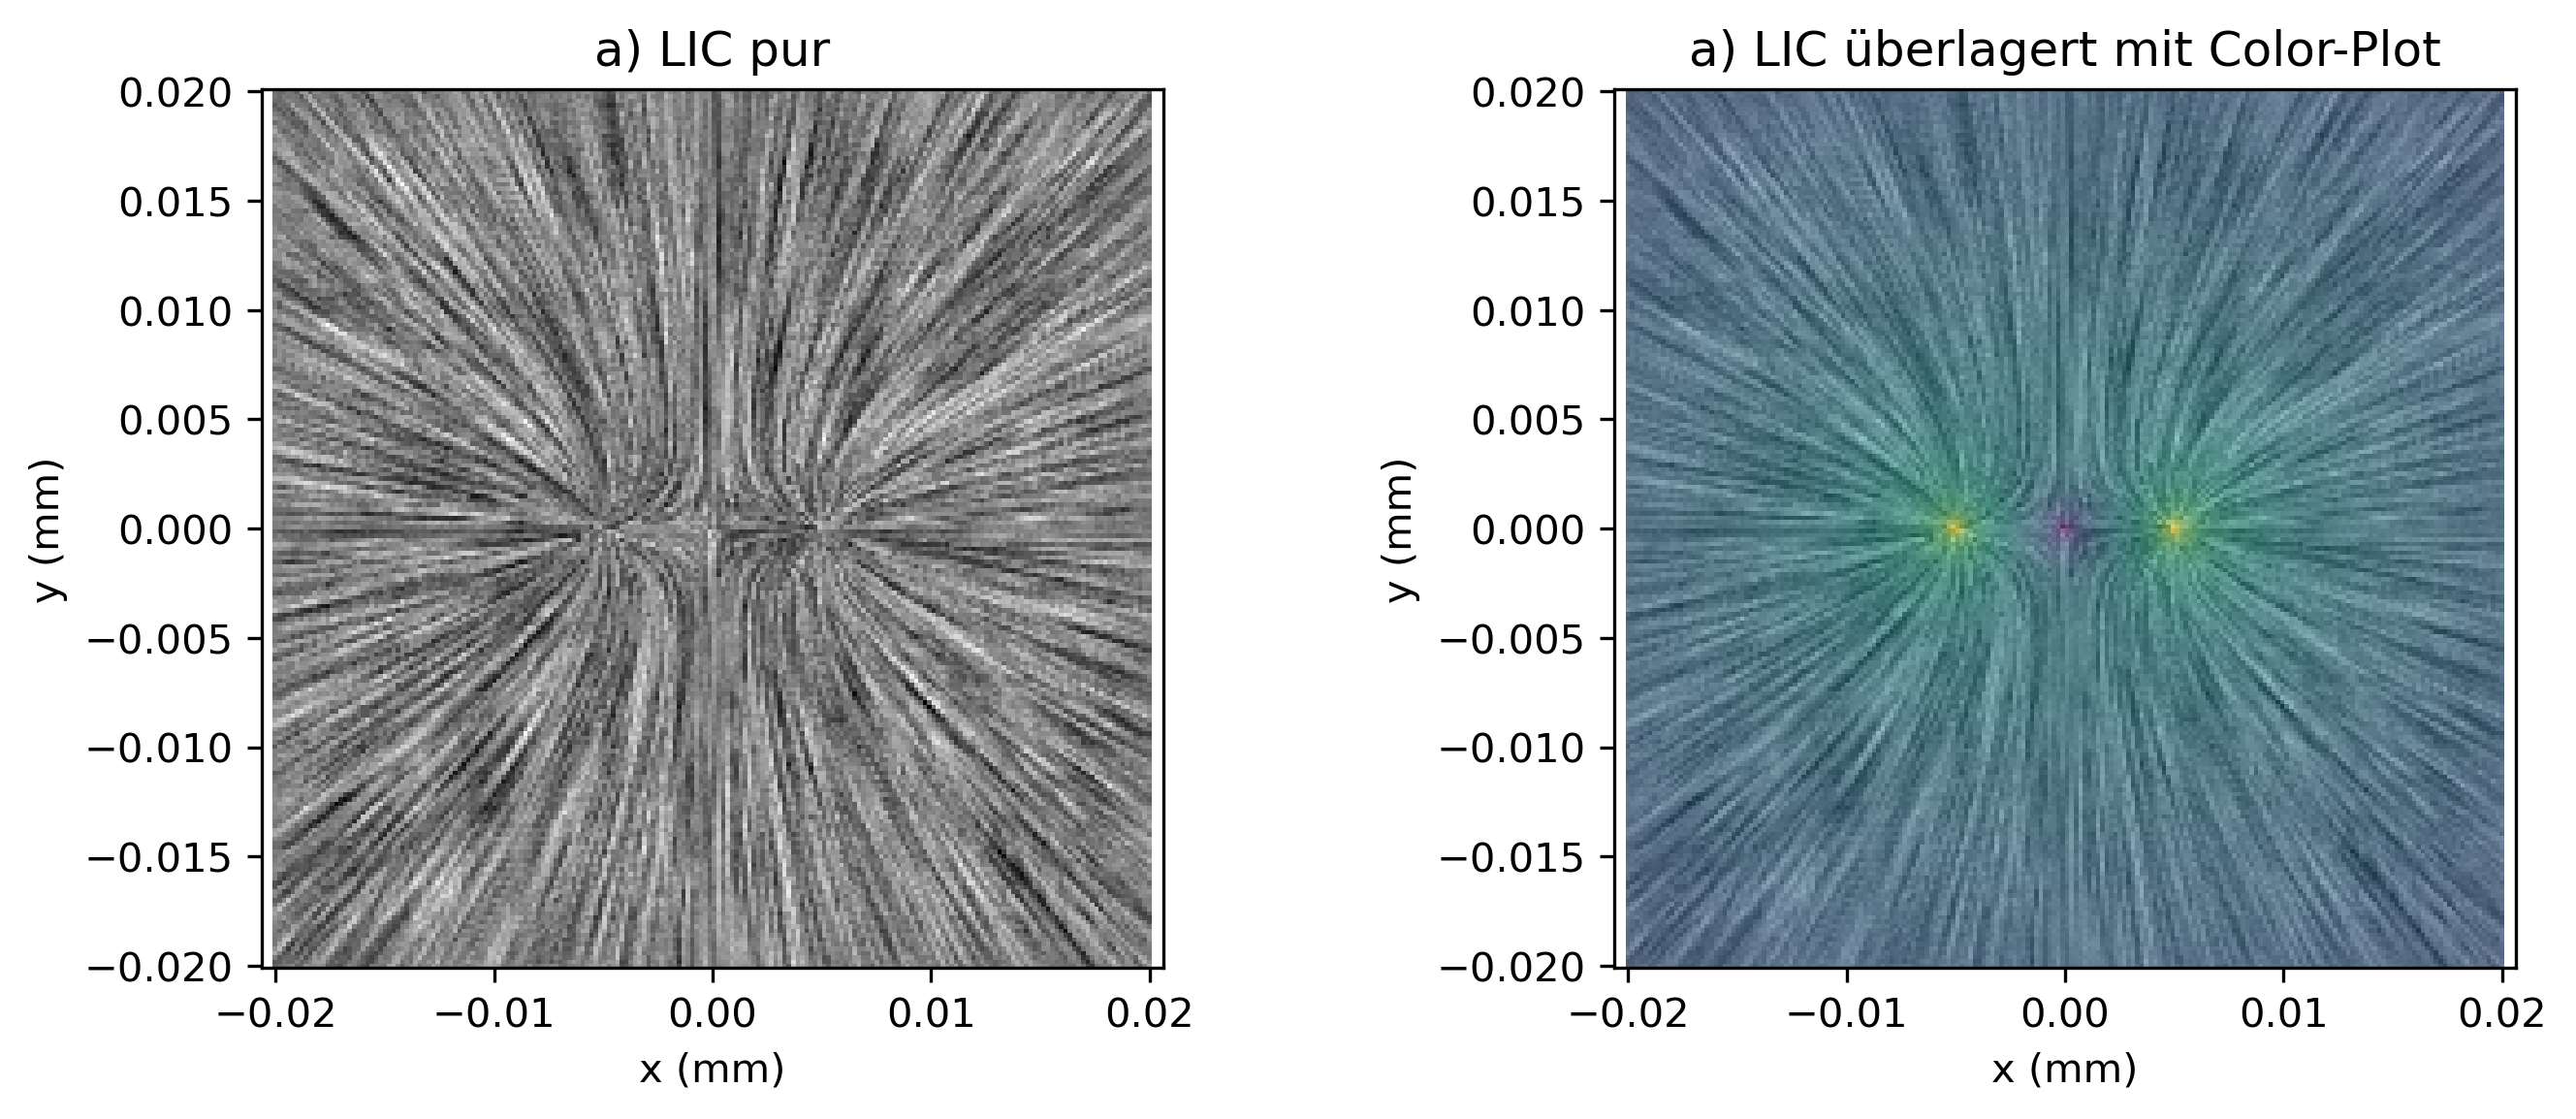

In [11]:
fig = plt.figure(figsize=[10,4], dpi=300)
fig.subplots_adjust(wspace=0.5, hspace=0.5)
axs = fig.subplots(1, 2)

axs[0].axis('equal')
axs[0].set_xlabel('x (mm)')
axs[0].set_ylabel('y (mm)')
axs[0].set_title('a) LIC pur')
axs[0].pcolor(xx_f, yy_f, lic_result, cmap='gray', shading='auto')

axs[1].axis('equal')
axs[1].set_xlabel('x (mm)')
axs[1].set_ylabel('y (mm)')
axs[1].set_title('a) LIC überlagert mit Color-Plot')
axs[1].pcolormesh(xx_f, yy_f, lic_result, cmap='gray', shading='auto')
axs[1].pcolormesh(xx_f, yy_f, 20*np.log10(field_abs_f/field_absmax_f), shading='auto', alpha=0.5)

plt.show()